<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Caos: Primera parte

Colaboración con SEBASTIAN IBARRA, PATO BARBER, FER ARELLE

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  a largo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Por la manera en la que está definida la función. Si 0<= r <= 4 entonces r es positivo. Como 0<=x<=1 --> 0<= 1-x<=1 entonces 0<= rx(1-x)=<1 --> 0<= f(x) <= 1

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [13]:
def logistic_map(x,r):
    return r*x*(1-x)

In [14]:
logistic_map(2,3)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *

from sympy import Symbol
x = Symbol('x')
r = Symbol('r')
f = Function('f')

Eq(x,f(x))

In [3]:
Eq(2*x*(1-x))

/opt/conda/lib/python3.9/site-packages/sympy/core/relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


In [4]:
Eq(1,2*(1-x))

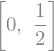

In [5]:
solve(Eq(x, 2*x*(1-x)))

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

#### INTENTO 1

In [6]:
Eq(f(x), 2*x*(1-x))

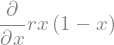

In [7]:
Derivative(r*x*(1-x),x)

In [8]:
diff(r*x*(1-x),x)

In [9]:
abs(diff(logistic_map(x,2),x))

NameError: name 'logistic_map' is not defined

In [10]:
plot(abs(diff(logistic_map(x,2),x)),(x,0,1))

NameError: name 'logistic_map' is not defined

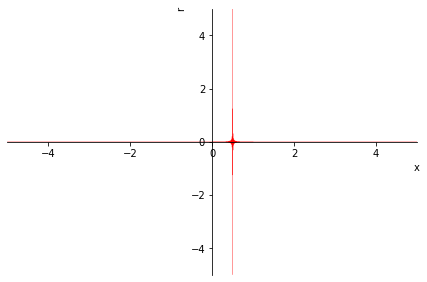

In [11]:
plot_implicit(Abs(diff(r*x*(1-x),x)), line_color = 'r')


#### INTENTO 2

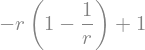

In [15]:
diff(logistic_map(x,r),x).replace(x,1-1/r)

In [16]:
solve(abs(diff(logistic_map(x,r),x).replace(x,1-1/r))<1)

<div class="alert alert-info">
Ejercicio Programa un control para cambiar  𝑟  entre  0  y  4  (con un slider) y otro para definid  𝑥0 . Grafica logistic_map respecto al número de iteraciones  𝑁 . ¿Qué observas? ¿Puedes ver algún periodo?¿Está cerca de los puntos fijos?
</div>

In [35]:
from ipywidgets import interact, fixed, widgets, FloatSlider
import matplotlib.pyplot as plt
interact(logistic_map,x=fixed(x),r=4)

interactive(children=(IntSlider(value=4, description='r', max=12, min=-4), Output()), _dom_classes=('widget-in…

<function __main__.logistic_map(x, r)>

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=3.0, description='m…

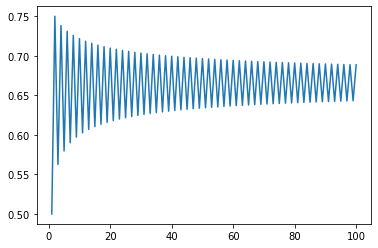

In [36]:
fig, ax= plt.subplots(figsize=(6,4))

x= [i for i in range(1,101)]
@widgets.interact(x0=(0,1,0.1),mu=(0,4,0.20))
def update(x0=0.5, mu=3):
    [l.remove() for l in ax.lines]
    ax.plot(x, iterarLista(g=logistic_map, x0=x0, N=100, mu=mu))

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

In [38]:
a= iterarLista(logistic_map, 0.35, 100, 2.8)
b= iterarLista(logistic_map, 0.35, 100, 3.1)

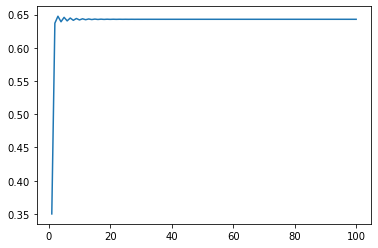

In [39]:
plt.plot([i for i in range(1,101)],a)

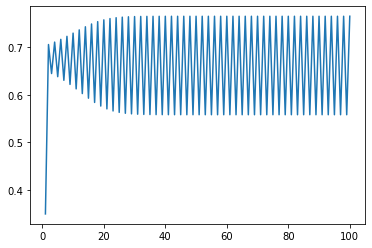

In [40]:
plt.plot([i for i in range(1,101)],b)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [23]:
def iterar(g, x0, N, r):
    if N==0:
        return x0
    if N>1:
        return g(iterar(g,x0,N-1,r),r)
    else:
        return g(x0,r)
    pass

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [24]:
def iterarLista(g, x0, N, mu):
    return [iterar(g,x0,i,mu) for i in range(N)]

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [28]:
x1= iterarLista(logistic_map, 1/10, 100, 0.8)
x2= iterarLista(logistic_map, 1/10, 100, 1.2)
x3= iterarLista(logistic_map, 1/10, 100, 2.8)
x4= iterarLista(logistic_map, 1/10, 100, 3.2)

In [29]:
x1

# Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [42]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def logis_plot(r):
    plt.figure(2)
    x=np.linspace(0,1,num=1000)
    plt.plot(x,r*x*(1-x))
    plt.plot(x,x)
    plt.show()

interactive_plot=interactive(logis_plot, r=(0,4))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=2, description='r', max=4), Output(layout=Layout(height='350px'))), _dom…

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

si

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [44]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

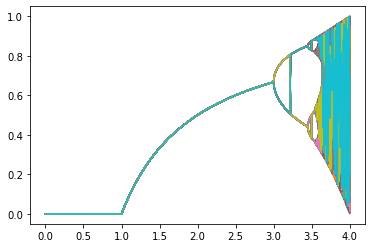

In [45]:
r_rand=np.linspace(0,4,1000)
t=1e-5*np.ones(1000)
for i in range(1000):
    t=logistic_map(t,r_rand)
    if i >= 900:
        plt.plot(r_rand, t)